<a id = 'top'></a>
### CLOATHING IMAGE CLASSIFICATION MODEL
- in this notebook we will be building a convolutional neural network capable of classifing a cloathing item into 1 of 10 categories
- [PROJECT AIM AND DATA](#aim)
- [CONVOLUTIONAL NEURAL NETWORK](#cnn)
- [CONCLUSION](#conclusion)
-------------------------------------------------------------[BACK TO TOP](#top)

In [1]:
# some of these libraries may not be used in the project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sklearn
import time
import math
import random
import os

<a id = ''></a>
### PROJECT AIM AND DATA
#### Aim
- in this notebook we will be building a convolutional neural network capable of classifing a cloathing item into 1 of 10 categories
#### DATA
- we will be using a dataset called fashion amnist which contains 70k greyscale 28x28 pixel images
  we will train our model on 60k images and test our model on 10k images
- these images are stored as a 3 dimentional np array
-------------------------------------------------------------[BACK TO TOP](#top)

In [24]:
# loading the fashion mnist  dataset for classification 
# splitting the data into train and test and printing their respective shapes
data = tf.keras.datasets.fashion_mnist.load_data()
xtrain = data[0][0].reshape(xtrain.shape[0],28,28,1)
ytrain = data[0][1]
xtest  = data[1][0].reshape(xtest.shape[0],28,28,1)
ytest  = data[1][1]
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


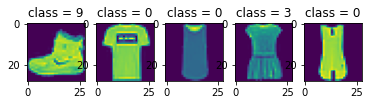

In [26]:
# visualising few images 
for a in range(5):
    plt.subplot(1,5,a+1)
    plt.imshow(xtrain[a,:,:].reshape(28,28))
    plt.title(f"class = {ytrain[a]}")


<a id = 'cnn'></a>
### CLASSFICATION USING CNN
-------------------------------------------------------------[BACK TO TOP](#top)

In [27]:
cnn = tf.keras.Sequential([
    tf.keras.Input(shape = [28,28,1]),
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides = (2,2),padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=16,activation = 'relu'),
    tf.keras.layers.Dense(units = 10 , activation = 'softmax')  
])
los = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.Adam()
met = tf.keras.metrics.SparseCategoricalAccuracy()
cnn.compile(optimizer = opt,loss = los,metrics = met)

In [28]:
history = cnn.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3367 - sparse_categorical_accuracy: 0.5448
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7808 - sparse_categorical_accuracy: 0.6891
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5536 - sparse_categorical_accuracy: 0.7748
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4828 - sparse_categorical_accuracy: 0.8114
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4099 - sparse_categorical_accuracy: 0.8598
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3595 - sparse_categorical_accuracy: 0.8756
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3246 - sparse_categorical_accuracy: 0.8864
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3035 - sparse_categorical_accuracy: 0.8931
Epoch 9/10
1875/1875 [==

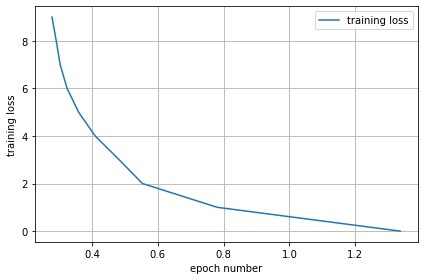

In [35]:
# plotting test error with epochs
plt.plot(history.history['loss'],range(10),label = 'training loss')
plt.xlabel('epoch number',)
plt.ylabel('training loss')
plt.legend()
plt.tight_layout()
plt.grid()

In [37]:
# testing the model on test set
from sklearn.metrics import classification_report,confusion_matrix
pred = cnn.predict(xtest)
pred = np.argmax(pred,axis=1)
print('complete report ',classification_report(ytest,pred))
print(confusion_matrix(ytest,pred))

complete report                precision    recall  f1-score   support

           0       0.77      0.88      0.82      1000
           1       0.96      0.97      0.97      1000
           2       0.81      0.81      0.81      1000
           3       0.88      0.87      0.87      1000
           4       0.81      0.76      0.78      1000
           5       0.98      0.97      0.98      1000
           6       0.67      0.62      0.65      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[876   3  13  30   5   0  67   1   5   0]
 [  3 975   3  10   7   0   0   0   2   0]
 [ 19   1 812  10  82   0  76   0   0   0]
 [ 26  22   6 869  35   0  40   0   2   0]
 [  2   5  95  28 763   0 105   0   2   0]
 [  1   3

<a id = 'conclusion'></a>
### CONCLUSIONS
- the traiing accuracy of the model is      90 %
- while the test accuracy of the model is   88 %
- So, the model is suffering from a slight variance(overfitting to the training set)
- The model performance can be further imporved by tuning the hyperparameters on validation set
  